### Stock Market Prediction And Forecasting Using Stacked LSTM

In [4]:
import pandas as pd

In [6]:
data=pd.read_csv("E:/Projects/Stock Price Prediction/AAPL.csv")

In [8]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [12]:
data=data['close']

In [14]:
data.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

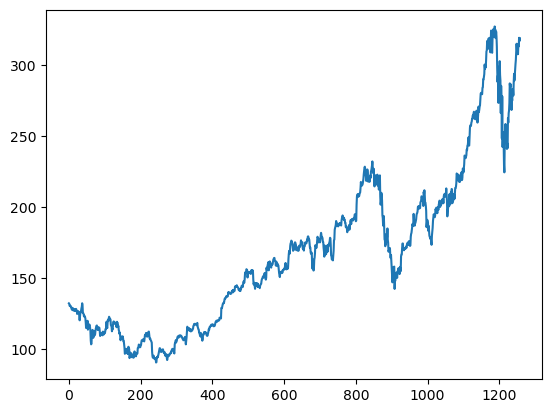

In [16]:
import matplotlib.pyplot as plt
plt.plot(data)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler :

In [18]:
import numpy as np

In [19]:
data = pd.DataFrame(data)

In [20]:
data.head()

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [22]:
data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [23]:
##splitting dataset into train and test split
training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:]

In [24]:
training_size,test_size

(1006, 252)

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----125   126
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 126
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(880, 126)
(880,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(126, 126)
(126,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 351ms/step - loss: 0.0494 - val_loss: 0.1348
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - loss: 0.0077 - val_loss: 0.0109
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.0022 - val_loss: 0.0078
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - loss: 9.4219e-04 - val_loss: 0.0079
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 9.1763e-04 - val_loss: 0.0096
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - loss: 8.8433e-04 - val_loss: 0.0112
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 8.3670e-04 - val_loss: 0.0120
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - loss: 7.8207e-04 - val_loss: 0.0096
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - loss: 6.7556e-04 - val_loss: 0.0131
Epoch 12/100
14/

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.19.0'

In [41]:
### prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

154.14830359614896

In [51]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

284.1038410641703

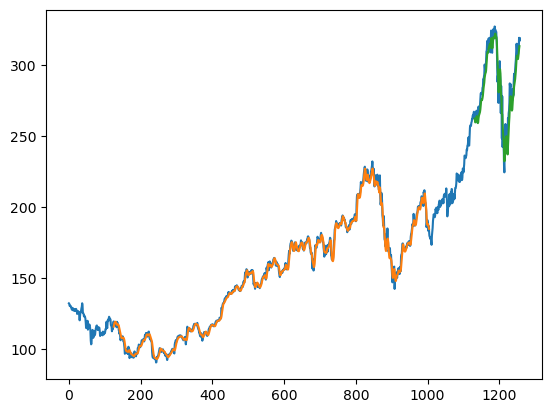

In [79]:
### Plotting 
# shift train predictions for plotting
look_back=125
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [81]:
len(test_data)

252

In [93]:
x_input=test_data[126:].reshape(1,-1)
x_input.shape


(1, 126)

In [95]:
x_input

array([[0.72477413, 0.72380309, 0.74318163, 0.73440007, 0.74938782,
        0.7468969 , 0.73385122, 0.71396606, 0.72363421, 0.73984632,
        0.76150469, 0.74550367, 0.75208984, 0.761758  , 0.76467111,
        0.78024994, 0.8001351 , 0.80245715, 0.79962847, 0.80081061,
        0.7983619 , 0.81761378, 0.81875369, 0.84256523, 0.84210082,
        0.84936249, 0.85835515, 0.8866419 , 0.87431394, 0.88431985,
        0.87836697, 0.8986321 , 0.92582116, 0.92877649, 0.95676771,
        0.93869797, 0.93304061, 0.94950604, 0.96424048, 0.95512117,
        0.95989192, 0.96635143, 0.96246728, 0.92295027, 0.9598497 ,
        0.98792536, 0.98594106, 0.92531453, 0.92172591, 0.96474711,
        0.97572406, 0.99159841, 0.96972895, 0.97614625, 0.96795575,
        1.        , 0.99016297, 0.99050072, 0.96538039, 0.98488559,
        0.97086887, 0.94026007, 0.87748037, 0.83483915, 0.85413324,
        0.77336823, 0.77269273, 0.88014017, 0.84007431, 0.89673225,
        0.85527316, 0.83884995, 0.74233725, 0.82

In [97]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [99]:
temp_input

[0.7247741281769824,
 0.7238030904331674,
 0.7431816262771258,
 0.7344000675504521,
 0.7493878240310732,
 0.7468969011230264,
 0.7338512201300349,
 0.713966055897999,
 0.7236342143038084,
 0.7398463227222833,
 0.7615046863125898,
 0.7455036730558138,
 0.7520898421008193,
 0.7617580005066285,
 0.7646711137380733,
 0.7802499366714515,
 0.8001351009034876,
 0.8024571476821754,
 0.7996284725154101,
 0.8008106054209239,
 0.7983619015452168,
 0.8176137802921559,
 0.8187536941653297,
 0.8425652284049652,
 0.8421008190492276,
 0.8493624926116694,
 0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.92531453179093

In [153]:
day_new=np.arange(1,127)
day_pred=np.arange(127,157)

In [155]:
import matplotlib.pyplot as plt

In [157]:
len(data)

1258

In [172]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=126
i=0
while(i<30):
    
    if(len(temp_input)>126):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94691485
 0.94439977 0.93932176 0.93424529 0.92982984 0.92616117 0.92316288
 0.92069215 0.91857564 0.91663945 0.91473049 0.91273111 0.91056359
 0.90819013 0.9056043  0.90282416 0.8998819  0.89681578 0.89366317
 0.89045578 0.88721752 0.88396376 0.88070095 0.877

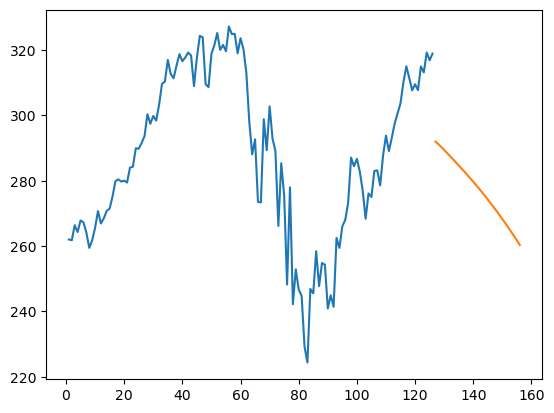

In [162]:
plt.plot(day_new,scaler.inverse_transform(data[1132:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

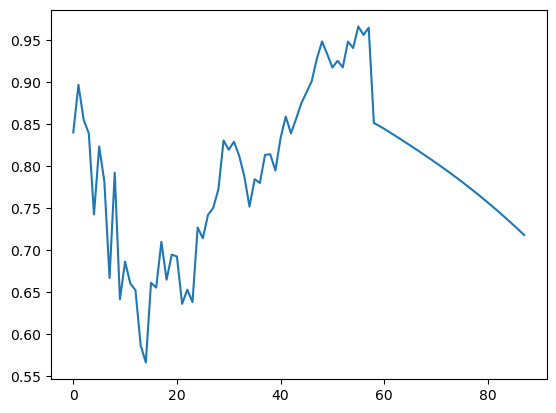

In [164]:
df3=data.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [166]:
df3=scaler.inverse_transform(df3).tolist()

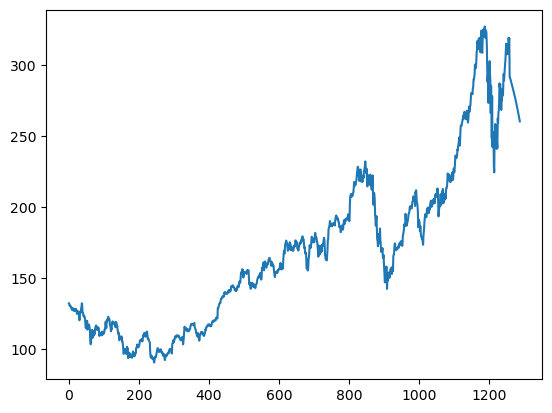

In [168]:
plt.plot(df3)